In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data_dir = "data_out"
gen_name = "4fold-imperfection-"
project_num = 112
var_all = ['t','x','y','z']
a = f"{data_dir}/{gen_name}{project_num}_x_all.txt"
x_all = np.loadtxt(f"{data_dir}/{gen_name}{project_num}_x_all.txt")
y_all = np.loadtxt(f"{data_dir}/{gen_name}{project_num}_y_all.txt")
z_all = np.loadtxt(f"{data_dir}/{gen_name}{project_num}_z_all.txt")
t_all = np.loadtxt(f"{data_dir}/{gen_name}{project_num}_t_all.txt")


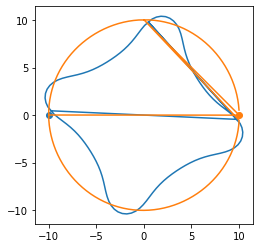

In [3]:
#re order all points
#plot last frame w/ pts
frame_idx = len(t_all) - 1
x_plot = x_all[:,frame_idx]
y_plot = y_all[:,frame_idx]

fig, ax = plt.subplots(1,1)
ax.plot(x_plot,y_plot)
ax.plot(x_all[:,0],y_all[:,0])
ax.scatter(x_all[0,0],y_all[0,0])
ax.scatter(x_all[1,0],y_all[1,0])

ax.set_aspect('equal', 'box')

num_nodes = np.shape(x_all)[0]
phase_all = np.zeros((num_nodes,))

for i in range(num_nodes):
    tan_temp = np.arctan2(y_all[i,0],x_all[i,0])
    if tan_temp < 0:
        phase_all[i] = tan_temp + 2*np.pi
    else:
        phase_all[i] = tan_temp

#todo: currently now it goes from -pi --> pi and I'd prefer it go from 0 --> 2pi uhh fix that
resort_idx = np.argsort(phase_all + np.pi)

x_all = x_all[resort_idx,:]
y_all = y_all[resort_idx,:]
z_all = z_all[resort_idx,:]

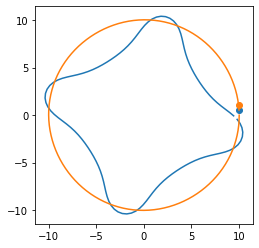

In [4]:
frame_idx = len(t_all) - 1
x_plot = x_all[:,frame_idx]
y_plot = y_all[:,frame_idx]

fig, ax = plt.subplots(1,1)
ax.plot(x_plot,y_plot)
ax.plot(x_all[:,0],y_all[:,0])
ax.scatter(x_all[0,0],y_all[0,0])
ax.scatter(x_all[1,0],y_all[1,0])

ax.set_aspect('equal', 'box')

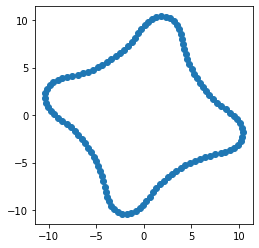

In [5]:
#plot last frame
frame_idx = len(t_all) - 1
x_plot = x_all[:,frame_idx]
y_plot = y_all[:,frame_idx]

fig, ax = plt.subplots(1,1)
ax.scatter(x_plot,y_plot)
ax.set_aspect('equal', 'box')


In [6]:
num_nodes = np.shape(x_all)[0]
norm_ordered = np.zeros((num_nodes,))
idx_end = len(t_all) - 1

for i in range(num_nodes):
    xy_norm = np.linalg.norm(np.array([x_all[i,idx_end],y_all[i,idx_end]]))
    norm_ordered[i] = xy_norm

idx_ordered = np.argsort(norm_ordered)
smallest_four = idx_ordered[0:4]
largest_four = idx_ordered[num_nodes - 4:num_nodes]

29.0

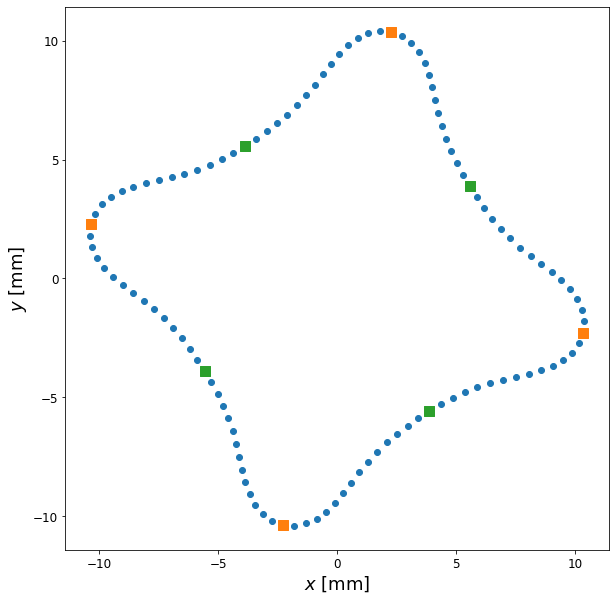

In [7]:
#plot last frame w/ pts
frame_idx = len(t_all) - 1
x_plot = x_all[:,frame_idx]
y_plot = y_all[:,frame_idx]

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(x_plot,y_plot)

#plot 4 largest and smallest
ax.scatter(x_all[largest_four,frame_idx],y_all[largest_four,frame_idx], s = 100, marker = 's')
ax.scatter(x_all[smallest_four,frame_idx],y_all[smallest_four,frame_idx], s = 100, marker = 's')
ax.set_aspect('equal', 'box')

ax.set_xlabel("$x$ [mm]", fontsize = 18)
ax.set_ylabel("$y$ [mm]", fontsize = 18)
ax.tick_params(labelsize = 12)

plt.savefig('center_shape.png')

np.shape(x_plot)[0]/4




In [8]:
#find closest large pt to being on (0,y)
radius_large = np.max(norm_ordered)
pt_y = np.array([0,radius_large])
idx_end = len(t_all) - 1

nearest_idx = largest_four[0]
dist_temp = np.linalg.norm(np.array([x_all[nearest_idx,idx_end],y_all[nearest_idx,idx_end]]) - pt_y)

for i in range(1,4):
    idx = largest_four[i]
    array_cur = np.array([x_all[idx,idx_end],y_all[idx,idx_end]])
    dist_compare = np.linalg.norm(array_cur - pt_y)
    if dist_compare < dist_temp:
        nearest_idx = idx
        dist_temp = dist_compare
closest_y_large = np.array([x_all[nearest_idx,idx_end],y_all[nearest_idx,idx_end]])
closest_y_large_idx = nearest_idx

#find closest two small points to closest large pt
nearest_idx = smallest_four[0]
dist_small_all = np.zeros((4,))

for i in range(4):
    idx = smallest_four[i]
    array_cur = np.array([x_all[idx,idx_end],y_all[idx,idx_end]])
    dist_small_all[i] = np.linalg.norm(array_cur - closest_y_large)
small_idx_sorted = np.argsort(dist_small_all)
small_idx = np.array(smallest_four[small_idx_sorted[0:2]])
small_idx = np.sort(small_idx)
small_idx

array([10, 39])

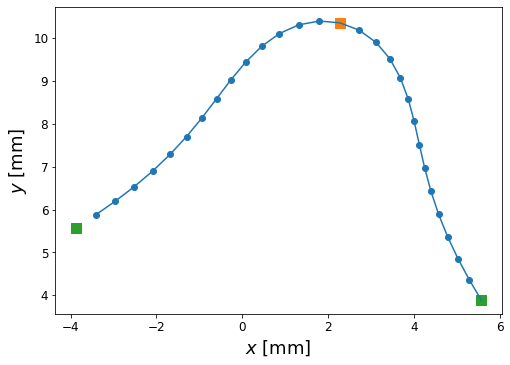

In [9]:
#plot last frame w/ pts
frame_idx = len(t_all) - 1
x_plot = x_all[small_idx[0]:(small_idx[1]),frame_idx]
y_plot = y_all[small_idx[0]:(small_idx[1]),frame_idx]

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(x_plot,y_plot)
ax.plot(x_plot,y_plot)

#plot 4 largest and smallest
ax.scatter(x_all[closest_y_large_idx,frame_idx],y_all[closest_y_large_idx,frame_idx], 
    s = 100, marker = 's')
ax.scatter(x_all[small_idx,frame_idx],y_all[small_idx,frame_idx], s = 100, marker = 's')

ax.set_aspect('equal', 'box')

ax.set_xlabel("$x$ [mm]", fontsize = 18)
ax.set_ylabel("$y$ [mm]", fontsize = 18)
ax.tick_params(labelsize = 12)

plt.savefig('quarter_shape.png')


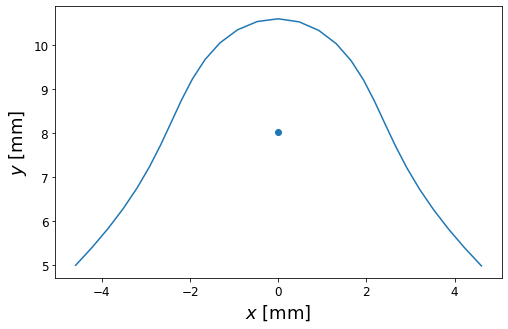

In [10]:
theta_rot = np.pi/2 - np.arctan2(y_all[closest_y_large_idx,frame_idx],x_all[closest_y_large_idx,frame_idx])
rotation_matrix = np.array([[np.cos(theta_rot), -np.sin(theta_rot)],[np.sin(theta_rot),np.cos(theta_rot)]])

x_test = x_all[small_idx[0]:(small_idx[1]),frame_idx].copy()
y_test = y_all[small_idx[0]:(small_idx[1]),frame_idx].copy()

for i in range(len(x_test)):
    vec_cur = np.array([x_test[i],y_test[i]])
    vec_cur = np.dot(rotation_matrix,vec_cur)
    x_test[i] = vec_cur[0]
    y_test[i] = vec_cur[1]

fig, ax = plt.subplots(figsize = (8,8))
ax.plot(x_test,y_test)
ax.scatter(np.mean(x_test), np.mean(y_test))

#plot 4 largest and smallest
# ax.scatter(x_all[small_idx,frame_idx],y_all[small_idx,frame_idx])
# ax.scatter(x_all[closest_y_large_idx,frame_idx],y_all[closest_y_large_idx,frame_idx])

ax.set_aspect('equal', 'box')

ax.set_xlabel("$x$ [mm]", fontsize = 18)
ax.set_ylabel("$y$ [mm]", fontsize = 18)
ax.tick_params(labelsize = 12)

plt.savefig('quarter_shape_rot.png')


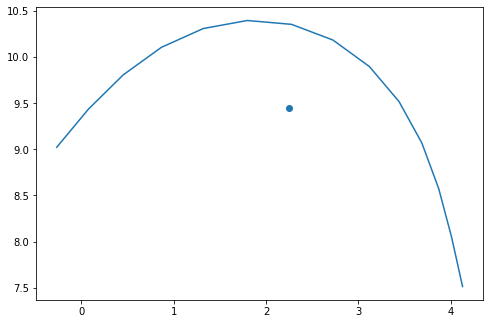

In [11]:
x_test = x_all[small_idx[0] + 7:(small_idx[1] - 8),frame_idx].copy()
y_test = y_all[small_idx[0] + 7:(small_idx[1] - 8),frame_idx].copy()

np.shape(x_test)

fig, ax = plt.subplots(figsize = (8,8))
ax.plot(x_test,y_test)
ax.scatter(np.mean(x_test), np.mean(y_test))
ax.set_aspect('equal', 'box')

In [20]:
print(np.mean(x_test))
print(np.mean(y_test))
thickness = 0.54 #mm
# thickness = 0.6 #trying stuff

def compute_moments_area(x_cur, y_cur):
    centroid_x = np.mean(x_cur)
    centroid_y = np.mean(y_cur)

    I_x = 0
    I_y = 0

    for i in range(len(x_cur)-1):
        #all dist are in mm
        x_dist = x_cur[i] - centroid_x
        y_dist = y_cur[i] - centroid_y

        ell = np.linalg.norm(np.array([x_cur[i+1],y_cur[i+1]]) - np.array([x_cur[i],y_cur[i]]))
        dA = ell * thickness
        I_x += y_dist*y_dist*dA
        I_y += x_dist*x_dist*dA

    return (I_x,I_y)

(I_x_test,I_y_test) = compute_moments_area(x_test,y_test)

print((I_x_test,I_y_test))



2.2496720174593583
9.44357453073774
(2.9309493114129785, 7.003300065936253)


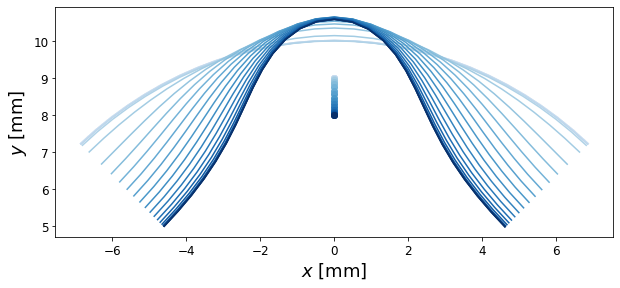

In [21]:
#process points for quarter shape
I_x_all = np.zeros(len(t_all))
I_y_all = np.zeros(len(t_all))
fig, ax = plt.subplots(figsize = (10,5))

for i in range(len(t_all)):
    #relevant idx: small_idx are how we cut and closest_y_large_idx defines top angle to rotate

    #get correct x and y pts
    x_current = x_all[small_idx[0]:small_idx[1],i].copy()
    y_current = y_all[small_idx[0]:small_idx[1],i].copy()

    #calculate theta to rotate
    theta_rot = np.pi/2 - np.arctan2(y_all[closest_y_large_idx,i],x_all[closest_y_large_idx,i])
    rotation_matrix = np.array([[np.cos(theta_rot), -np.sin(theta_rot)],[np.sin(theta_rot),np.cos(theta_rot)]])

    #rotate x and y
    x_rotated = np.zeros(len(x_current))
    y_rotated = np.zeros(len(y_current))

    

    for j in range(len(x_current)):
        vec_cur = np.array([x_current[j],y_current[j]])
        vec_cur = np.dot(rotation_matrix,vec_cur)
        x_rotated[j] = vec_cur[0]
        y_rotated[j] = vec_cur[1]
    
    color_plot = plt.get_cmap('Blues')(i/(len(t_all) - 1))
    ax.plot(x_rotated, y_rotated, color = color_plot)
    ax.scatter(np.mean(x_rotated), np.mean(y_rotated), color = color_plot)
    
    (I_x_all[i], I_y_all[i]) = compute_moments_area(x_rotated, y_rotated)

ax.set_aspect('equal', 'box')

ax.set_xlabel("$x$ [mm]", fontsize = 18)
ax.set_ylabel("$y$ [mm]", fontsize = 18)
ax.tick_params(labelsize = 12)

plt.savefig('quarter_shape_evolve.png')


0.6501578234221863

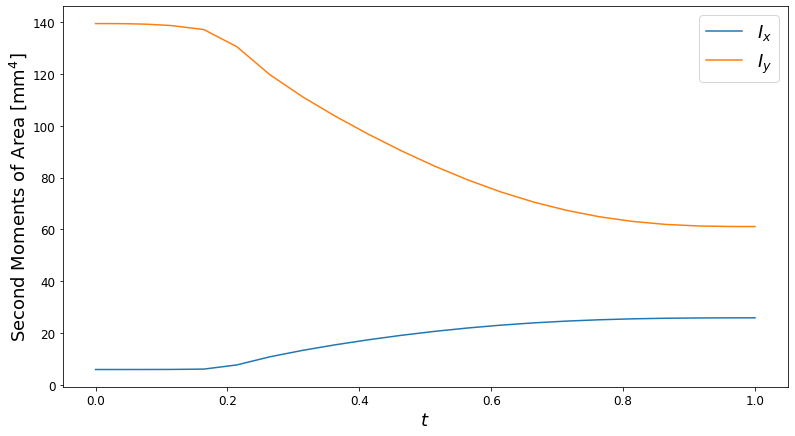

In [22]:
fig, ax = plt.subplots(figsize = (13,7))
ax.plot(t_all,I_x_all, label = '$I_x$')
ax.plot(t_all,I_y_all, label = '$I_y$')
# ax.plot(t_all,4*I_x_all, label = '$I_x$ adjusted')

I_x_end = I_x_all[-1]
I_y_end = I_y_all[-1]

#I_x = bh^3/12, I_y = h b^3/12

h = ((12**2 * I_x_end**3)/I_y_end)**(1./8)
b = 12*I_x_end/h**3

ax.legend(fontsize = 18, loc = 'best')

ax.set_xlabel("$t$", fontsize = 18)
ax.set_ylabel("Second Moments of Area [mm$^4$]", fontsize = 18)
ax.tick_params(labelsize = 12)

plt.savefig('moments_of_area_quarter.png')
h/b

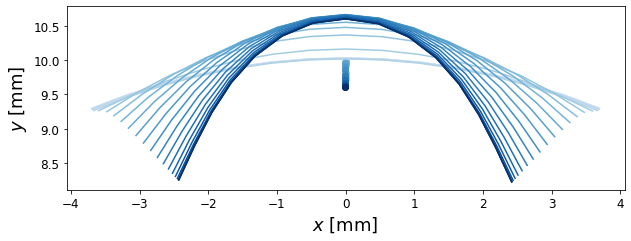

In [23]:
#process points for 1/8 shape
I_x_all = np.zeros(len(t_all))
I_y_all = np.zeros(len(t_all))
fig, ax = plt.subplots(figsize = (10,5))

for i in range(len(t_all)):
    #relevant idx: small_idx are how we cut and closest_y_large_idx defines top angle to rotate

    #get correct x and y pts
    x_current = x_all[small_idx[0] + 7:small_idx[1] - 7,i].copy()
    y_current = y_all[small_idx[0] + 7:small_idx[1] - 7,i].copy()

    #calculate theta to rotate
    theta_rot = np.pi/2 - np.arctan2(y_all[closest_y_large_idx,i],x_all[closest_y_large_idx,i])
    rotation_matrix = np.array([[np.cos(theta_rot), -np.sin(theta_rot)],[np.sin(theta_rot),np.cos(theta_rot)]])

    #rotate x and y
    x_rotated = np.zeros(len(x_current))
    y_rotated = np.zeros(len(y_current))

    

    for j in range(len(x_current)):
        vec_cur = np.array([x_current[j],y_current[j]])
        vec_cur = np.dot(rotation_matrix,vec_cur)
        x_rotated[j] = vec_cur[0]
        y_rotated[j] = vec_cur[1]
    
    color_plot = plt.get_cmap('Blues')(i/(len(t_all) - 1))
    ax.plot(x_rotated, y_rotated, color = color_plot)
    ax.scatter(np.mean(x_rotated), np.mean(y_rotated), color = color_plot)
    
    (I_x_all[i], I_y_all[i]) = compute_moments_area(x_rotated, y_rotated)

ax.set_aspect('equal', 'box')

ax.set_xlabel("$x$ [mm]", fontsize = 18)
ax.set_ylabel("$y$ [mm]", fontsize = 18)
ax.tick_params(labelsize = 12)

plt.savefig('eighth_shape_evolve.png')


0.47289275885463083

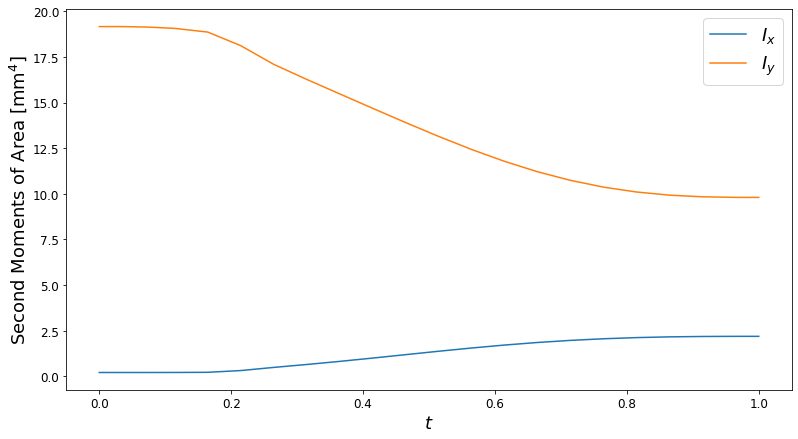

In [24]:
fig, ax = plt.subplots(figsize = (13,7))
ax.plot(t_all,I_x_all, label = '$I_x$')
ax.plot(t_all,I_y_all, label = '$I_y$')
# ax.plot(t_all,4*I_x_all, label = '$I_x$ adjusted')

I_x_end = I_x_all[-1]
I_y_end = I_y_all[-1]

#I_x = bh^3/12, I_y = h b^3/12

h = ((12**2 * I_x_end**3)/I_y_end)**(1./8)
b = 12*I_x_end/h**3

ax.legend(fontsize = 18, loc = 'best')

ax.set_xlabel("$t$", fontsize = 18)
ax.set_ylabel("Second Moments of Area [mm$^4$]", fontsize = 18)
ax.tick_params(labelsize = 12)

plt.savefig('moments_of_area_eighth.png')
h/b

In [122]:
h_adj = ((12**2 * 4*I_x_end**3)/I_y_end)**(1./8)
b_adj = 12*4*I_x_end/h**3
h

1.8781385071582015